# Задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 


# Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

**Рекомендации по выполнению проекта**

Проведите **первичную обработку** данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

Посмотрите на **распределение признака** для числовых переменных, устраните выбросы.

Оцените количество **уникальных значений** для номинативных переменных.

По необходимости **преобразуйте** данные.

Проведите **корреляционный анализ** количественных переменных.

Отберите не коррелирующие переменные.

Проанализируйте номинативные переменные и устраните те, которые **не влияют** на предсказываемую величину (в нашем случае — на переменную score).

Не забудьте **сформулировать выводы** относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import statsmodels.api as sm
import scipy.stats as sst

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

# ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ

In [3]:
display(stud.head(5))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ В СТОЛБЦАХ

Для удобства использования pandas переименуем все столбцы:

In [4]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
stud.rename(columns={'Pstatus': 'pstatus',
                     'Medu': 'medu',
                     'Fedu': 'fedu',
                     'Mjob': 'mjob',
                     'Fjob': 'fjob',
                     'studytime, granular': 'studytime_granular', }, inplace=True)
print(stud)

    school sex  age address famsize pstatus  medu  fedu      mjob      fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

     reason guardian  traveltime  studytime  failur

# school

In [6]:
pd.DataFrame(stud.school.value_counts(dropna=False))

,school
GP,349
MS,46


# sex

In [7]:
pd.DataFrame(stud.sex.value_counts(dropna=False))

,sex
F,208
M,187


# age

In [8]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Как видно, у этого признака нормальное распределение, выбросов нет.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

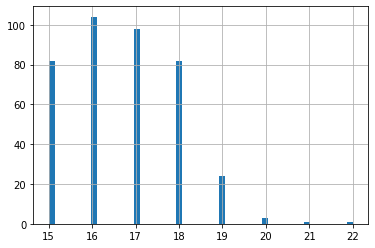

In [9]:
stud.age.hist(bins=50)
stud.age.describe()

# address

In [10]:
display(pd.DataFrame(stud.address.value_counts(dropna=False)))
stud.loc[:, ['address']].info()

,address
U,295
R,83
NaN,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [11]:
stud['address'] = stud['address'].fillna(stud.address.mode().iloc[0])

Поскольку есть пропущеные значения, заменим отсутсвующие данные на моду.

In [12]:
display(pd.DataFrame(stud.address.value_counts(dropna=False)))
stud.loc[:, ['address']].info()

,address
U,312
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# famsize

In [13]:
display(pd.DataFrame(stud.famsize.value_counts(dropna=False)))
stud.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107
NaN,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Поскольку есть пропущеные значения, заменим отсутсвующие данные на моду.

In [14]:
stud['famsize'] = stud['famsize'].fillna(stud.famsize.mode().iloc[0])

In [15]:
stud.famsize.value_counts(dropna=False)

GT3    288
LE3    107
Name: famsize, dtype: int64

count     395
unique      2
top       GT3
freq      288
Name: famsize, dtype: object

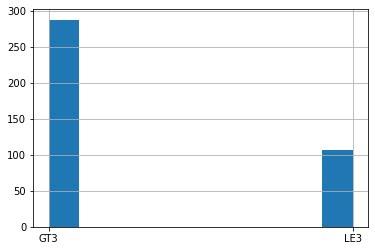

In [16]:
stud.famsize.hist()
stud.famsize.describe()

# pstatus

In [17]:
stud.pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: pstatus, dtype: int64

Заменим пропущенные значения ориентируясь на famsize.

In [18]:
stud.loc[((stud['pstatus'].isnull()) & (
    stud['famsize'] == 'GT3')), 'pstatus'] = 'T'

In [19]:
stud.pstatus.value_counts(dropna=False)

T      346
A       36
NaN     13
Name: pstatus, dtype: int64

# medu

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

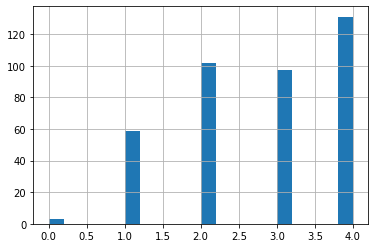

In [20]:
stud.medu.hist(bins=20)
stud.medu.describe()

Заменим пустые значения на медиану.

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

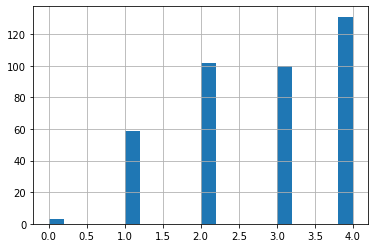

In [21]:
stud['medu'] = stud['medu'].fillna(stud.medu.median())
stud.medu.hist(bins=20)
stud.medu.describe()

Как видно, у этого признака нормальное распределение, выбросов нет

# fedu

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

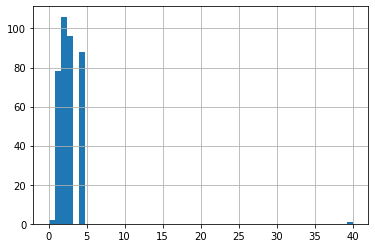

In [22]:
stud.fedu.hist(bins=50)
stud.fedu.describe()

В данных есть выбросы. Вероятно неправильно указан балл.

In [23]:
stud['fedu'] = stud['fedu'].replace(40, 4)

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

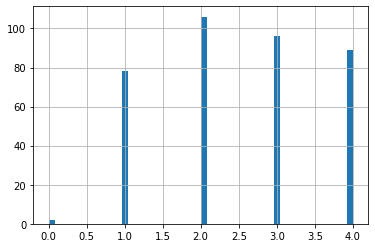

In [24]:
stud.fedu.hist(bins=50)
stud.fedu.describe()

Заменим пустые значения на медиану.

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

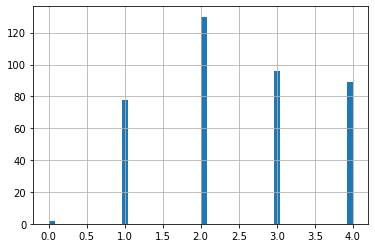

In [25]:
stud['fedu'] = stud['fedu'].fillna(stud.fedu.median())
stud.fedu.hist(bins=50)
stud.fedu.describe()

# mjob

In [26]:
display(pd.DataFrame(stud.mjob.value_counts(dropna=False)))
stud.loc[:, ['mjob']].info()

,mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# fjob

In [27]:
display(pd.DataFrame(stud.fjob.value_counts(dropna=False)))
stud.loc[:, ['fjob']].info()

,fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# reason

In [28]:
display(pd.DataFrame(stud.reason.value_counts(dropna=False)))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34
NaN,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [29]:
stud.reason = stud.reason.astype(str).apply(
    lambda x: 'other' if x.strip() == 'nan' else x)

In [30]:
display(pd.DataFrame(stud.reason.value_counts(dropna=False)))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# guardian

In [31]:
display(pd.DataFrame(stud.guardian.value_counts(dropna=False)))
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
NaN,31
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заменяем пустые значения (mjob,fjob,reason,guardian) на other.

In [32]:
stud.mjob = stud.mjob.astype(str).apply(
    lambda x: 'other' if x.strip() == 'nan' else x)
stud.fjob = stud.fjob.astype(str).apply(
    lambda x: 'other' if x.strip() == 'nan' else x)
stud.reason = stud.reason.astype(str).apply(
    lambda x: 'other' if x.strip() == 'nan' else x)
stud.guardian = stud.guardian.astype(str).apply(
    lambda x: 'other' if x.strip() == 'nan' else x)

# traveltime

In [33]:
display(pd.DataFrame(stud.traveltime.value_counts(dropna=False)))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заменим пустые значения traveltime на 1.0, как самое частое значение

In [34]:
stud['traveltime'] = stud.traveltime.apply(
    lambda x: 1.0 if pd.isnull(x) else x)

In [35]:
display(pd.DataFrame(stud.traveltime.value_counts(dropna=False)))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# studytime

In [36]:
display(pd.DataFrame(stud.studytime.value_counts(dropna=False)))
stud.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# failures

In [37]:
display(pd.DataFrame(stud.failures.value_counts(dropna=False)))
stud.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# schoolsup

In [38]:
display(pd.DataFrame(stud.schoolsup.value_counts(dropna=False)))
stud.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51
NaN,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [39]:
stud['schoolsup'] = stud['schoolsup'].replace('yes', 1)

In [40]:
stud['schoolsup'] = stud['schoolsup'].replace('no', 0)

In [41]:
display(pd.DataFrame(stud.schoolsup.value_counts(dropna=False)))
stud.loc[:, ['schoolsup']].info()

,schoolsup
0.0,335
1.0,51
NaN,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   schoolsup  386 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# famsup

In [42]:
display(pd.DataFrame(stud.famsup.value_counts(dropna=False)))
stud.loc[:, ['famsup']].info()

,famsup
yes,219
no,137
NaN,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# paid 

In [43]:
display(pd.DataFrame(stud.paid.value_counts(dropna=False)))
stud.loc[:, ['paid']].info()

,paid
no,200
yes,155
NaN,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# activities

In [44]:
display(pd.DataFrame(stud.activities.value_counts(dropna=False)))
stud.loc[:, ['activities']].info()

,activities
yes,195
no,186
NaN,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# nursery

In [45]:
display(pd.DataFrame(stud.nursery.value_counts(dropna=False)))
stud.loc[:, ['nursery']].info()

,nursery
yes,300
no,79
NaN,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# studytime_granular

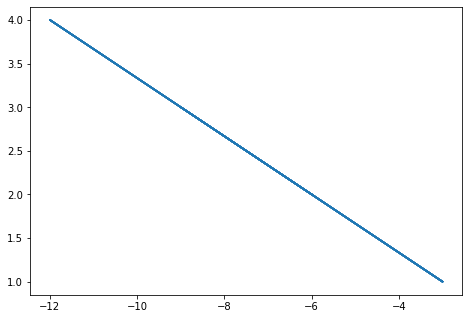

In [46]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(stud.studytime_granular, stud.studytime)

Вряд ли он пригодится для дальнейшего анализа, удалим его.

In [47]:
stud.drop(['studytime_granular'], inplace=True, axis=1)

# higher

In [48]:
display(pd.DataFrame(stud.higher.value_counts(dropna=False)))
stud.loc[:, ['higher']].info()

,higher
yes,356
NaN,20
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# internet 

In [49]:
display(pd.DataFrame(stud.internet.value_counts(dropna=False)))
stud.loc[:, ['internet']].info()

,internet
yes,305
no,56
NaN,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# romantic 

In [50]:
display(pd.DataFrame(stud.romantic.value_counts(dropna=False)))
stud.loc[:, ['romantic']].info()

,romantic
no,240
yes,124
NaN,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# famrel

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

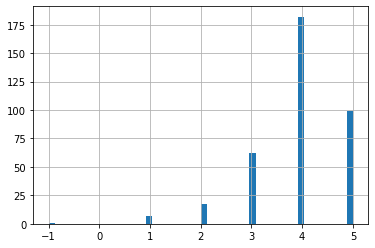

In [51]:
stud.famrel.hist(bins=50)
stud.famrel.describe()

Заменяем -1 на 0

count    368.000000
mean       3.940217
std        0.914141
min        0.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

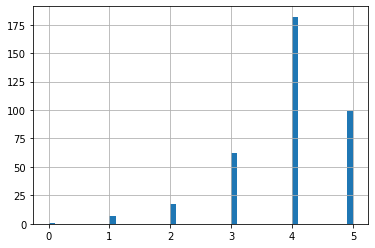

In [52]:
stud['famrel'] = stud['famrel'].replace(-1, 0)
stud.famrel.hist(bins=50)
stud.famrel.describe()

# freetime

In [53]:
display(pd.DataFrame(stud.freetime.value_counts(dropna=False)))
stud.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# goout

In [54]:
display(pd.DataFrame(stud.goout.value_counts(dropna=False)))
stud.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# health

In [55]:
display(pd.DataFrame(stud.health.value_counts(dropna=False)))
stud.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# absences

In [83]:
def show_plots(df, col_num='score', size=5):
    '''
      функция, которая рисует графики qq-plot, hist и boxplot для столбца col_num датасета df.
      Необязательные аргументы: 
       col_num - столбец, распределение которого нужно проверить
       size - размер рисунка                
    '''
    f = plt.figure()
    f.clear()
    plt.close(f)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*size, size))

    fig = sm.qqplot(df.dropna(subset=[col_num])[
                    col_num], fit=True, line='45', ax=ax1)
    fig.suptitle('QQ-plot, histogram and boxplot for {0} '.format(col_num))

    ax2.hist(df.dropna(subset=[col_num])[
             col_num], histtype='bar', align='mid', rwidth=0.8, color='green')
    ax3.boxplot(df.dropna(subset=[col_num])[col_num], vert=False)

    plt.show

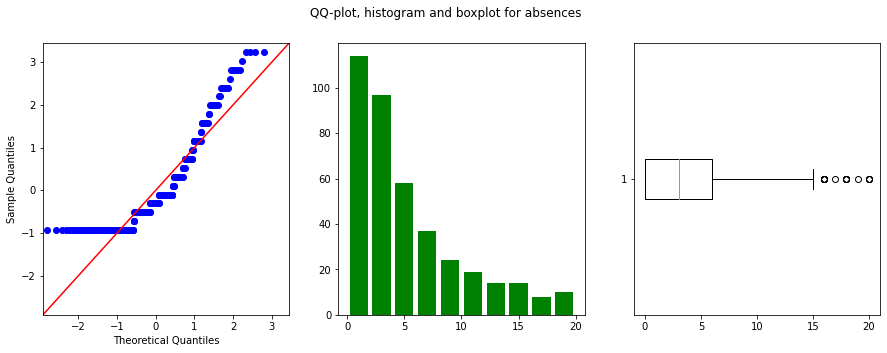

In [84]:
show_plots(stud, 'absences')

Столбец absences очень "испорчен" выбросами. Рассмотрим их

In [85]:
q1 = stud.absences.quantile(0.25)  # первый квантиль
q2 = stud.absences.quantile(0.5)  # медиана
q3 = stud.absences.quantile(0.75)  # третий квантиль
IQR = q3 - q1

'''посчитаем, сколько значений правее q3 + 1.5*IQR'''
print('Границы выбросов: [{l}, {r}] \n'.format(l=0, r=q3 + 1.5*IQR))
print('Количество значений датасета, правее верхней границы: ',
      len(stud[stud.absences > (q3 + 1.5*IQR)]))

Границы выбросов: [0, 15.0] 

Количество значений датасета, правее верхней границы:  18


Посмотрим, ниже какого значения количество пропусков у 95% студентов

In [86]:
q95 = stud['absences'].quantile(0.95)
print('У 95% студентов пропусков меньше, чем {0} \n'.format(round(q95)))
print('У {0} студентов пропусков больше этого значения'.format(
    len(stud[stud.absences > q95])))

У 95% студентов пропусков меньше, чем 14.0 

У 20 студентов пропусков больше этого значения


In [87]:
median = stud[stud.absences < q95]['absences'].median()
print('Медиана absences :', median)

Медиана absences : 3.0


In [88]:
stud['absences'] = stud.absences.apply(
    lambda x: median if (pd.isnull(x) | (x > q95)) else x)

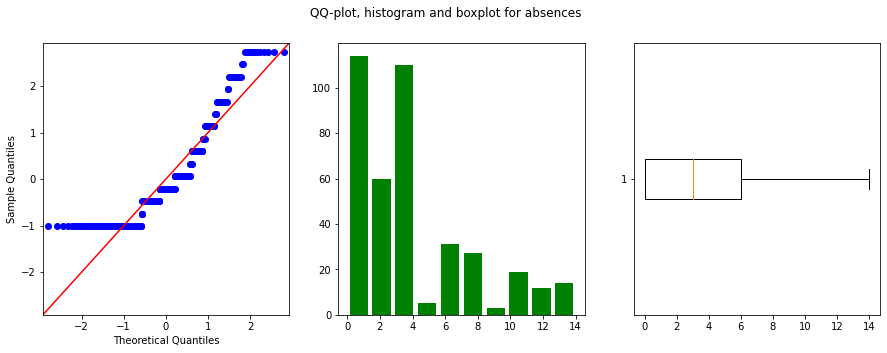

In [89]:
show_plots(stud, 'absences')

# score 

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

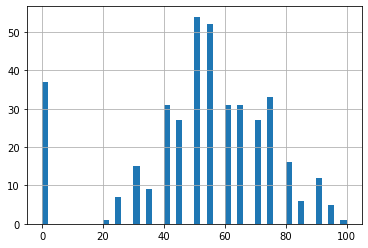

In [77]:
stud.score.hist(bins=50)
stud.score.describe()

Есть пустые значения. Заменим на медиану.

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

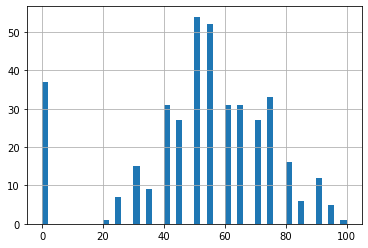

In [78]:
stud['score'] = stud['score'].fillna(stud.score.median())
stud.score.hist(bins=50)
stud.score.describe()

Займемся остальными категориальными признаками.

**Определим функцию заполнения пустых значений**

df - датасет, col - столбец, agg - среднее значение,
может принимать значение mode для кат. признака, median или mean для числового

is_cat - True, если кат. признак и False, если числовой

**Определим функцию заполнения пустых значений**

In [64]:
def fill_navalues(df, col, agg='mode', is_cat=True):

    if is_cat:
        agg_value = df[col].agg(agg)[0]
        df[col] = df[col].fillna(agg_value)

    else:
        try:
            is_number = float(df[col][1])
        except:
            print('Колонка {0} не числовая. Для is_cat = {1} используйте только числовые колонки'.format(
                col, is_cat))
        else:
            agg_value = df[col].agg(agg)
            df[col] = df[col].fillna(agg_value)

Заменим пустые значения

In [65]:
for i in stud.drop(['age', 'score', 'absences', 'address', 'traveltime'],  axis=1):
    fill_navalues(stud, i)

Проверим, в каких колонках остались пустые значения.

In [66]:
stud.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

# КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

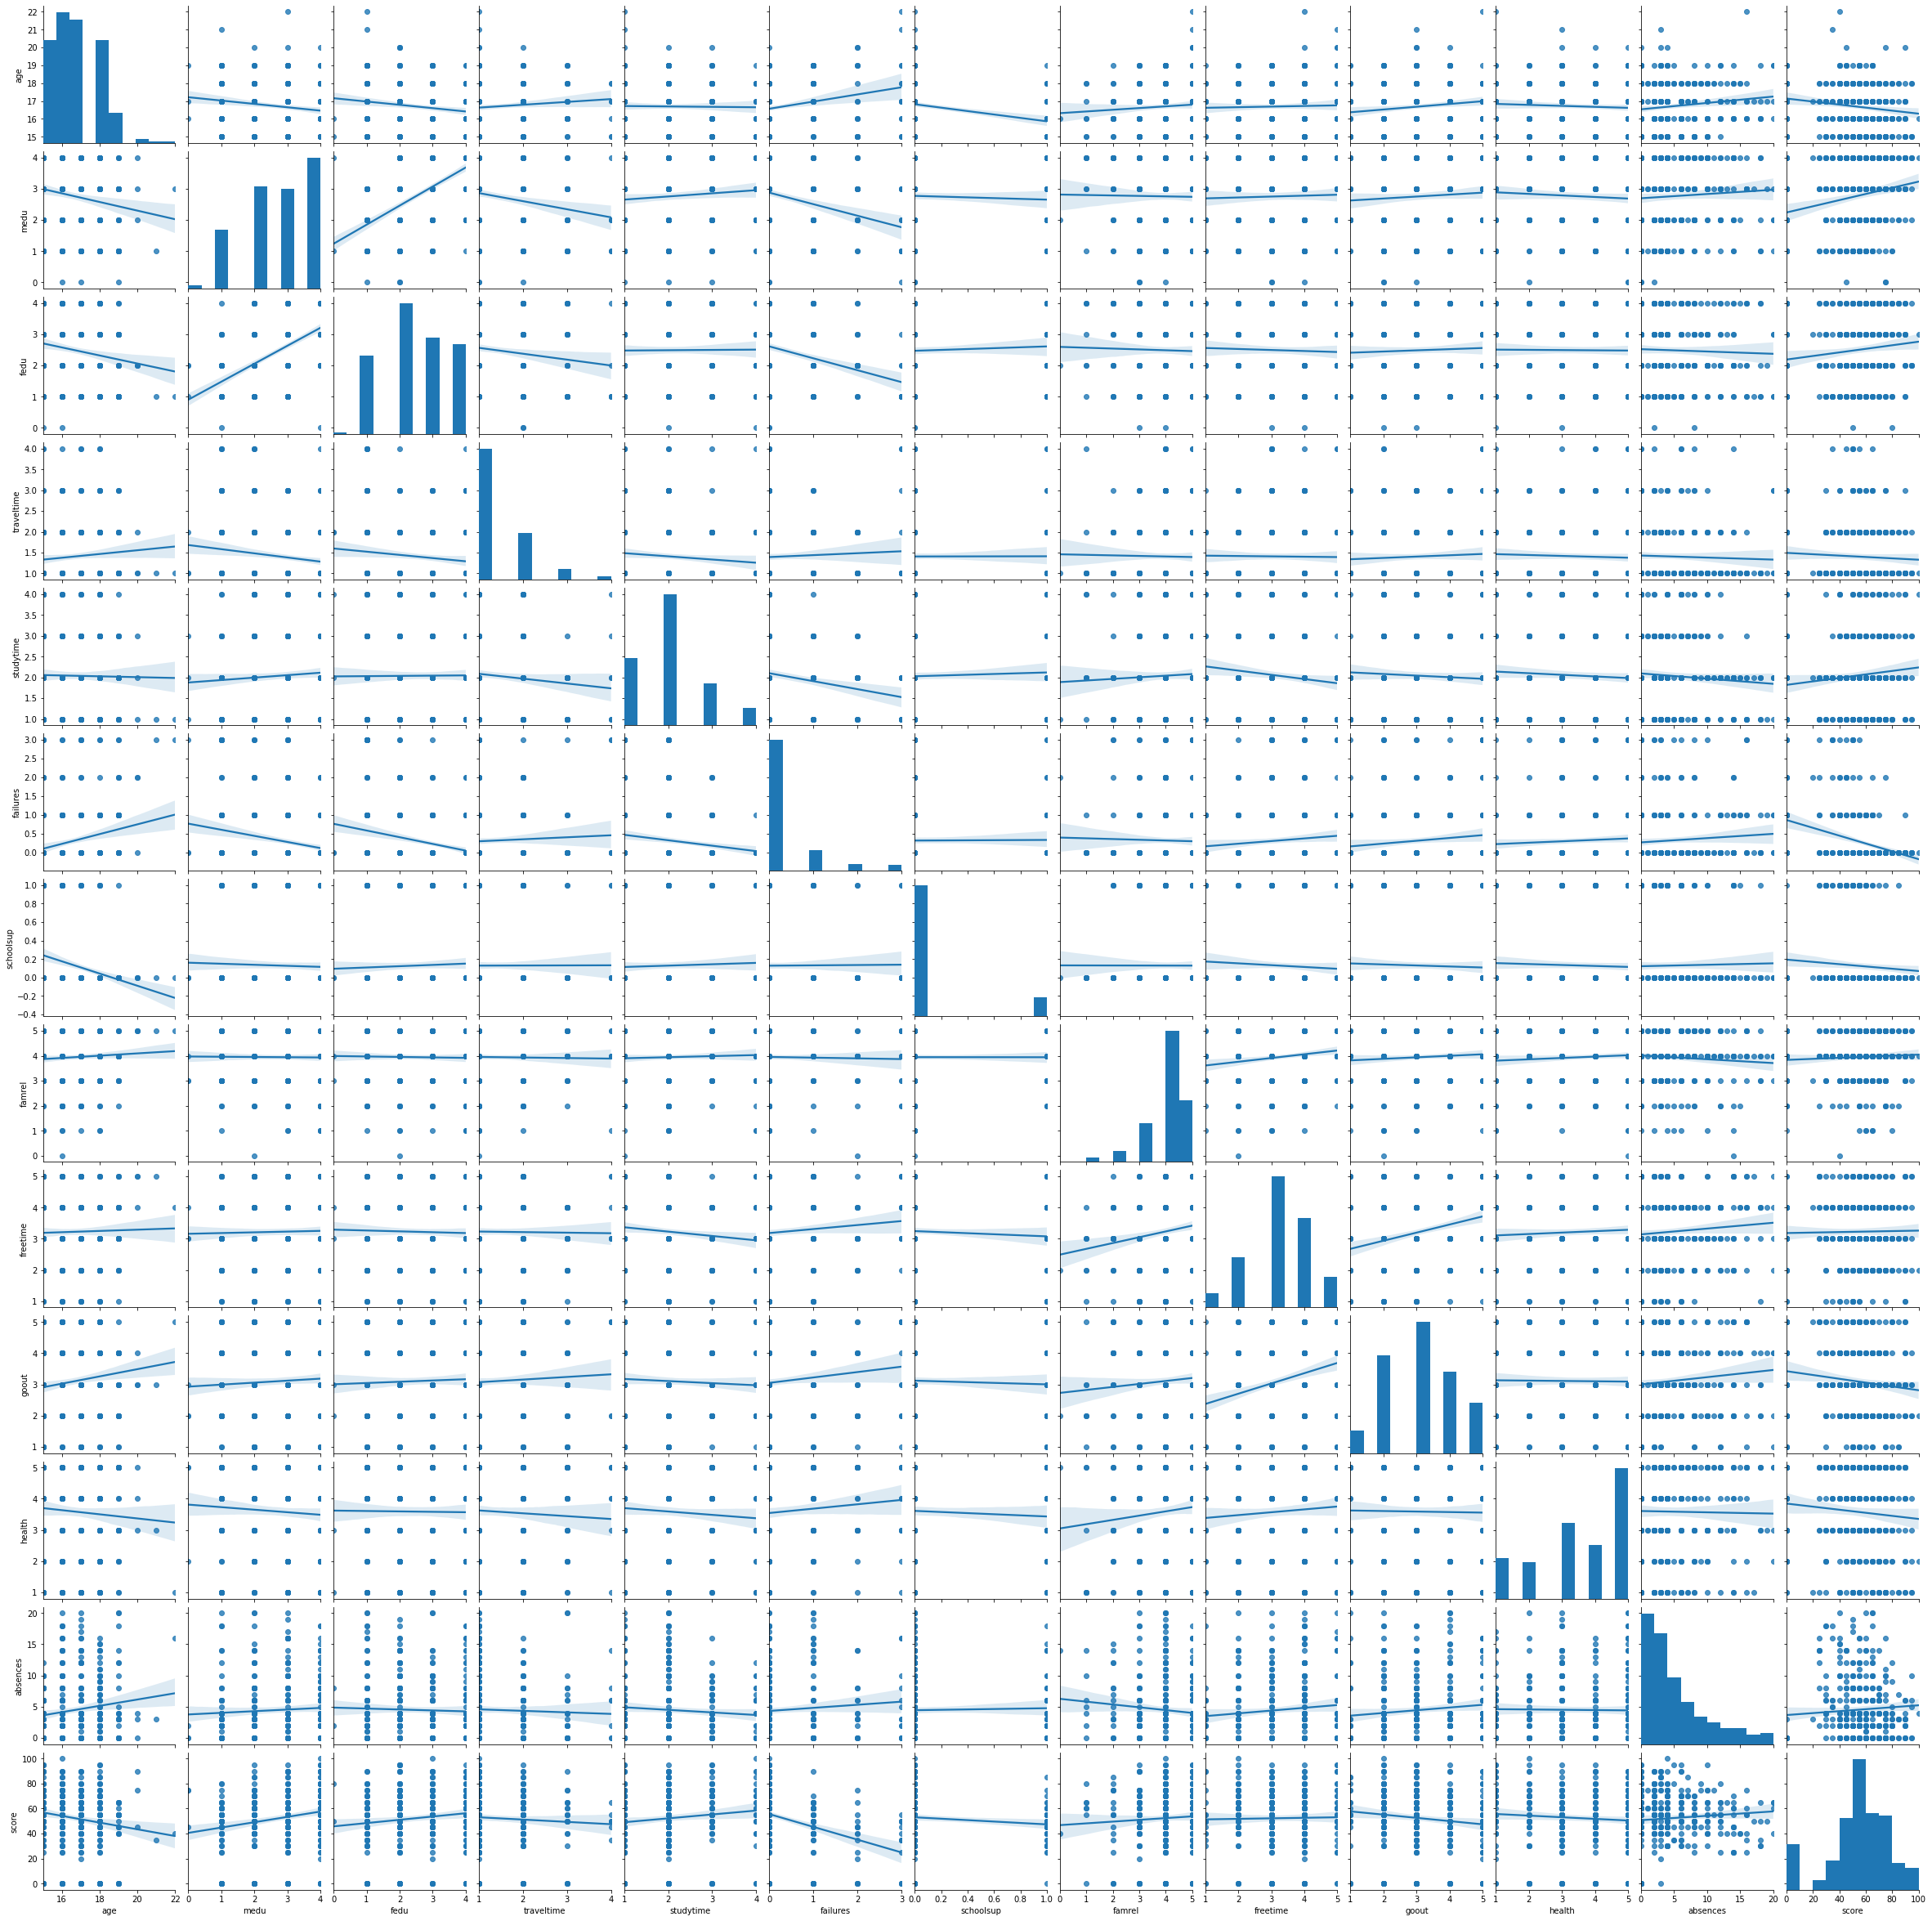

In [67]:
sns.pairplot(stud, kind='reg')

Используем для наглядности матрицу корреляций:

In [68]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,schoolsup,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.228081,-0.251811,0.066083,0.026443,0.134069,-0.060506,0.134462,-0.151150
medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.036941,-0.011720,0.026210,0.063361,-0.063796,0.059778,0.205568
fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.260690,0.044189,-0.022489,-0.029868,0.039084,-0.009862,-0.033527,0.122642
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,0.002369,-0.017097,-0.012496,0.051775,-0.044325,-0.034509,-0.055243
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,-0.166598,0.036804,0.040790,-0.119014,-0.051090,-0.064860,-0.071814,0.114371
failures,0.228081,-0.245110,-0.260690,0.049670,-0.166598,1.000000,0.007616,-0.023693,0.094826,0.113649,0.072497,0.074851,-0.326532
schoolsup,-0.251811,-0.036941,0.044189,0.002369,0.036804,0.007616,1.000000,-0.001366,-0.057742,-0.036227,-0.043020,0.022390,-0.083912
famrel,0.066083,-0.011720,-0.022489,-0.017097,0.040790,-0.023693,-0.001366,1.000000,0.167051,0.076253,0.086269,-0.082920,0.054461
freetime,0.026443,0.026210,-0.029868,-0.012496,-0.119014,0.094826,-0.057742,0.167051,1.000000,0.292305,0.064299,0.091024,0.018200
goout,0.134069,0.063361,0.039084,0.051775,-0.051090,0.113649,-0.036227,0.076253,0.292305,1.000000,-0.013284,0.100130,-0.125708



Статистически значимые критерии в датасете:
 ['medu', 'fedu', 'studytime', 'failures', 'schoolsup', 'goout']

# АНАЛИЗ НОМИНАТИВНЫХ ПЕРЕМЕННЫХ

In [94]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(20, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

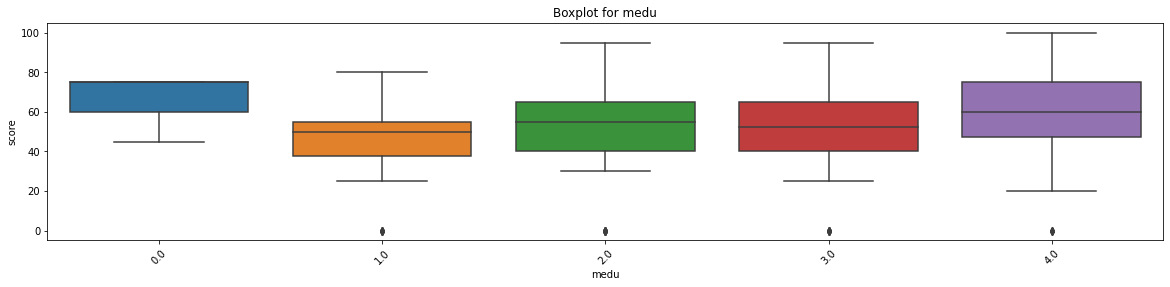

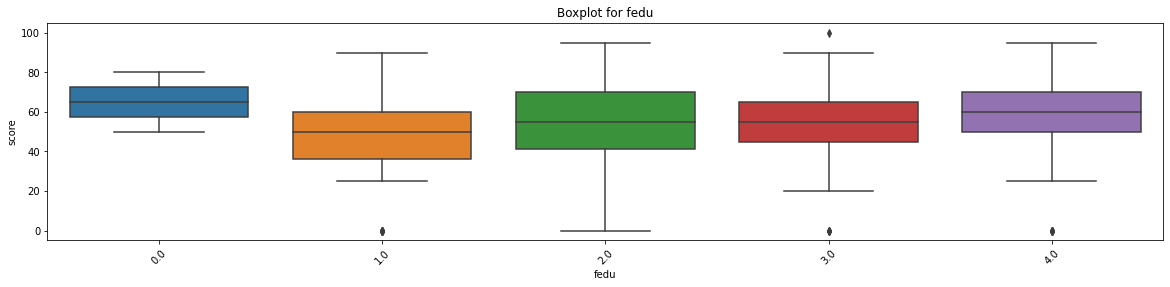

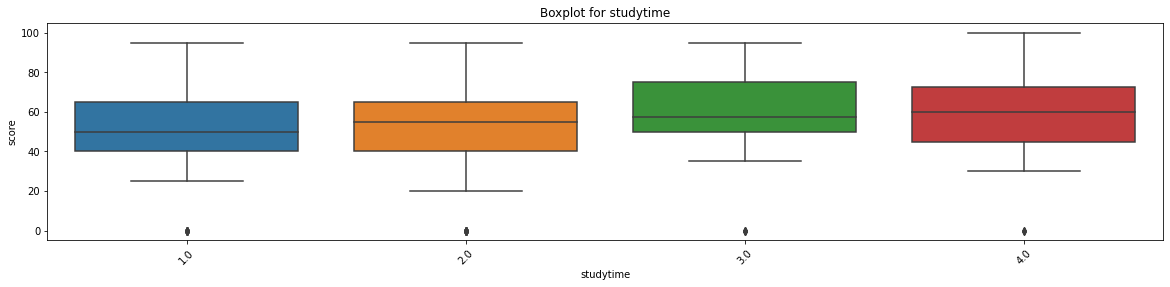

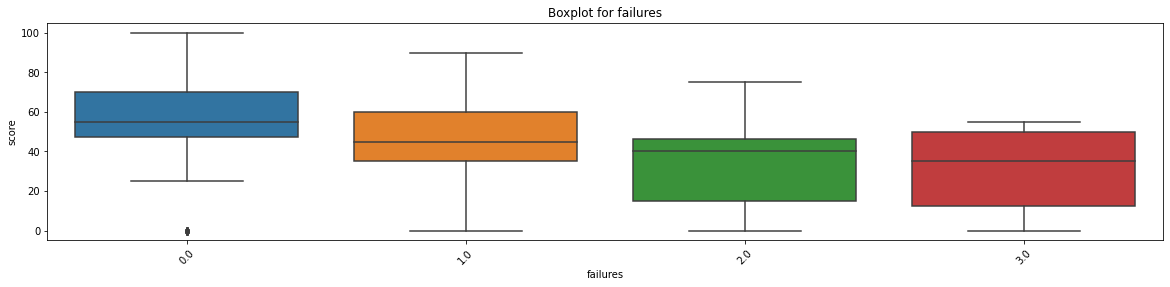

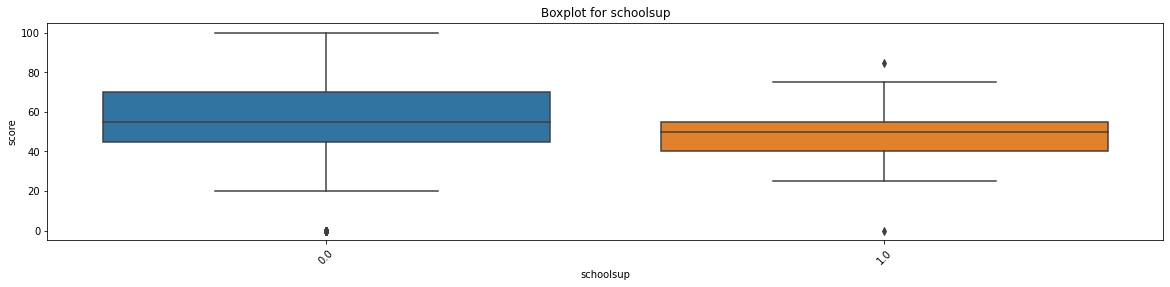

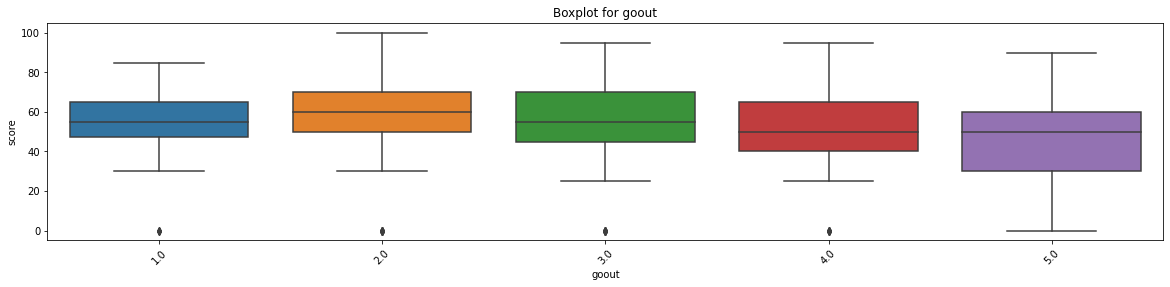

In [95]:
for col in ['medu', 'fedu', 'studytime', 'failures', 'schoolsup', 'goout']:
    get_boxplot(col)

In [96]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [99]:
for col in ['age', 'medu', 'fedu',
            'traveltime', 'studytime',
            'failures', 'schoolsup',  'famrel',
            'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки absences


In [102]:
stud_for_model = stud.loc[:, ['age', 'medu', 'fedu',
                              'traveltime', 'studytime',
                              'failures', 'schoolsup',  'famrel',
                              'freetime', 'goout', 'health', 'absences']]
stud_for_model.head()

,age,medu,fedu,traveltime,studytime,failures,schoolsup,famrel,freetime,goout,health,absences
0,18,4.0,4.0,2.0,2.0,0.0,1.0,4.0,3.0,4.0,3.0,6.0
1,17,1.0,1.0,1.0,2.0,0.0,0.0,5.0,3.0,3.0,3.0,4.0
2,15,1.0,1.0,1.0,2.0,3.0,1.0,4.0,3.0,2.0,3.0,10.0
3,15,4.0,2.0,1.0,3.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0
4,16,3.0,3.0,1.0,2.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0


# ВЫВОД

В результате анализа влияния параметров условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике получены следующие выводы:

1) В данных достаточно много пустых значений, поэтому были применены различные методы заполнения пустот. В дальнейшем можно оценить эти методы относительно работы модели, и, возможно, появятся показания к изменению способа заполнения пустот.

2) Столбец absences содержит очень много выбросов и pvalue оценки гипотезы о нормальности значительно меньше 0,005. Поэтому можно сделать вывод, что данные в данном столбце не достаточно качественные. Однако, так как наблюдается отрицательная корреляция между absences и score (и с точки здравого смысла эта корреляция вполне оправдана), то было решено столбец очистить от выбросов и оставить в выборке.

3) Самые важные категориальные параметры, кодирующие условия жизни учеников, которые предлагается использовать в дальнейшем для построения модели, это  'medu', 'fedu', 'studytime', 'failures', 'schoolsup', 'goout'.